# Parquet Data Analysis Template
Interactive analysis of parquet files from the prediction service

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

In [4]:
# Load prediction results
predictions = pd.read_parquet('predictions/alpha_predictions.parquet')
print(f"Loaded {len(predictions)} predictions")
predictions.info()

Loaded 19836 predictions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   class_id              19836 non-null  object        
 1   month_end             19836 non-null  datetime64[ns]
 2   cik                   19836 non-null  object        
 3   ensemble_prediction   19836 non-null  float64       
 4   prediction_timestamp  19836 non-null  datetime64[us]
dtypes: datetime64[ns](1), datetime64[us](1), float64(1), object(2)
memory usage: 775.0+ KB


In [5]:
# Basic exploration
print("First 10 rows:")
predictions.head(10)

First 10 rows:


,class_id,month_end,cik,ensemble_prediction,prediction_timestamp
0,C000001973,2020-08-31,793769,-0.100513,2025-08-25 16:19:05.649307
1,C000001973,2020-08-31,793769,-0.102739,2025-08-25 16:19:05.649307
2,C000001973,2020-08-31,793769,-0.104144,2025-08-25 16:19:05.649307
3,C000001973,2020-08-31,793769,-0.101901,2025-08-25 16:19:05.649307
4,C000001973,2020-09-30,793769,-0.101942,2025-08-25 16:19:05.649307
5,C000001973,2020-09-30,793769,-0.103732,2025-08-25 16:19:05.649307
6,C000001973,2020-09-30,793769,-0.103650,2025-08-25 16:19:05.649307
7,C000001973,2020-09-30,793769,-0.095717,2025-08-25 16:19:05.649307
8,C000001973,2020-10-31,793769,-0.100705,2025-08-25 16:19:05.649307
9,C000001973,2020-10-31,793769,-0.103197,2025-08-25 16:19:05.649307


In [6]:
# Summary statistics
predictions.describe()

,month_end,ensemble_prediction,prediction_timestamp
count,19836,19836.000000,19836
mean,2023-05-30 18:54:31.143375360,-0.044191,2025-08-25 16:19:06.768249
min,2019-10-31 00:00:00,-0.209969,2025-08-25 16:19:05.649307
25%,2022-08-31 00:00:00,-0.091598,2025-08-25 16:19:06.143612
50%,2023-08-31 00:00:00,-0.034889,2025-08-25 16:19:06.718086
75%,2024-08-31 00:00:00,0.002638,2025-08-25 16:19:07.314017
max,2025-12-31 00:00:00,0.154829,2025-08-25 16:19:07.839712
std,NaN,0.055124,NaN


In [7]:
# Fund-level analysis
fund_summary = predictions.groupby('class_id').agg({
    'ensemble_prediction': ['count', 'mean', 'std', 'min', 'max']
}).round(4)

print("Fund-level statistics:")
fund_summary

Fund-level statistics:


ensemble_prediction                                
                         count    mean     std     min     max
class_id                                                      
C000001973                 164 -0.0948  0.0229 -0.1359 -0.0165
C000001974                 164 -0.0951  0.0230 -0.1372 -0.0165
C000001975                 164 -0.0951  0.0229 -0.1370 -0.0165
C000001976                 164 -0.0886  0.0269 -0.1518 -0.0261
C000001977                 164 -0.0894  0.0275 -0.1519 -0.0188
...                        ...     ...     ...     ...     ...
C000224555                 142 -0.0192  0.0377 -0.0826  0.0600
C000224556                 142 -0.0193  0.0378 -0.0825  0.0600
C000234832                  34  0.0068  0.0002  0.0064  0.0071
C000248152                  14  0.0071  0.0000  0.0070  0.0071
C000248153                  14  0.0071  0.0000  0.0070  0.0071

[174 rows x 5 columns]

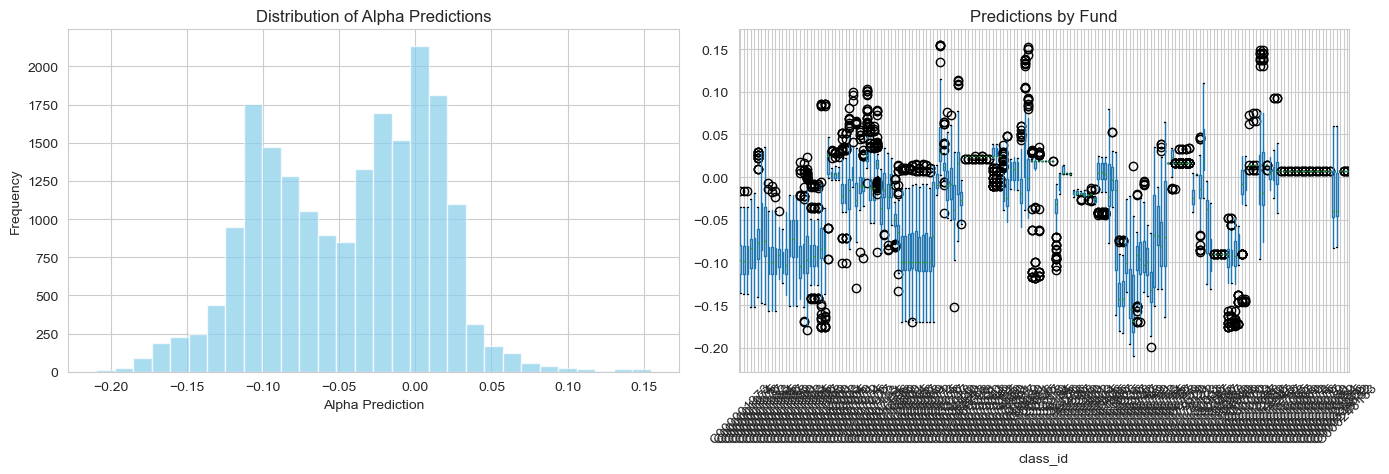

In [8]:
# Visualization: Distribution of predictions
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(predictions['ensemble_prediction'], bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of Alpha Predictions')
plt.xlabel('Alpha Prediction')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
predictions.boxplot(column='ensemble_prediction', by='class_id', ax=plt.gca())
plt.title('Predictions by Fund')
plt.suptitle('')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
# Load ETL data for comparison
etl_data = pd.read_parquet('data/pilot_fact_class_month.parquet')
print(f"Loaded {len(etl_data)} ETL records")
etl_data.info()

Loaded 19836 ETL records
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   class_id                  19836 non-null  object        
 1   month_end                 19836 non-null  datetime64[ns]
 2   return                    19836 non-null  float64       
 3   sales                     19836 non-null  float64       
 4   reinvest                  19836 non-null  float64       
 5   redemptions               19836 non-null  float64       
 6   total net assets          19836 non-null  float64       
 7   cash                      19836 non-null  float64       
 8   cik                       19836 non-null  object        
 9   filing_date               19836 non-null  datetime64[ns]
 10  flows                     19836 non-null  float64       
 11  vol_of_flows              19488 non-null  float64      

In [10]:
# Merge predictions with ETL data for deeper analysis
merged = pd.merge(predictions, etl_data, on=['class_id', 'month_end'], how='left')
print(f"Merged dataset: {len(merged)} records")
merged.head()

Merged dataset: 250538 records


,class_id,month_end,cik_x,ensemble_prediction,prediction_timestamp,return,sales,reinvest,redemptions,total net assets,cash,cik_y,filing_date,flows,vol_of_flows,MKT_RF,SMB,HML,RMW,CMA,RF,MOM,expense ratio,turnover ratio,manager_tenure,age,realized alpha,alpha (intercept t-stat),market beta t-stat,size beta t-stat,value beta t-stat,profit. beta t-stat,invest. beta t-stat,momentum beta t-stat,R2,realized alpha lagged,tna_lag,value_added
0,C000001973,2020-08-31,793769,-0.100513,2025-08-25 16:19:05.649307,-0.0453,4.041938e+08,0.00,1.214819e+09,3.703986e+10,0.0,793769,2020-12-17,-8.106251e+08,NaN,0.0762,-0.0089,-0.0302,0.0427,-0.0151,0.0001,0.0046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C000001973,2020-08-31,793769,-0.100513,2025-08-25 16:19:05.649307,0.0815,6.498032e+08,0.00,1.091196e+09,3.771627e+10,0.0,793769,2020-09-25,-4.413926e+08,NaN,0.0762,-0.0089,-0.0302,0.0427,-0.0151,0.0001,0.0046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.703986e+10,NaN
2,C000001973,2020-08-31,793769,-0.100513,2025-08-25 16:19:05.649307,0.1505,5.510449e+08,0.00,5.705130e+08,3.042722e+10,0.0,793769,2020-06-22,-1.946808e+07,3.958708e+08,0.0762,-0.0089,-0.0302,0.0427,-0.0151,0.0001,0.0046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.771627e+10,NaN
3,C000001973,2020-08-31,793769,-0.100513,2025-08-25 16:19:05.649307,0.0437,6.003301e+08,2062.24,1.003674e+09,3.251862e+10,0.0,793769,2020-03-26,-4.033416e+08,3.233895e+08,0.0762,-0.0089,-0.0302,0.0427,-0.0151,0.0001,0.0046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.042722e+10,NaN
4,C000001973,2020-08-31,793769,-0.102739,2025-08-25 16:19:05.649307,-0.0453,4.041938e+08,0.00,1.214819e+09,3.703986e+10,0.0,793769,2020-12-17,-8.106251e+08,NaN,0.0762,-0.0089,-0.0302,0.0427,-0.0151,0.0001,0.0046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/fc/jqz2k7hj0k314gq_bhynjmdc0000gn/T/ipykernel_17346/1769784103.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


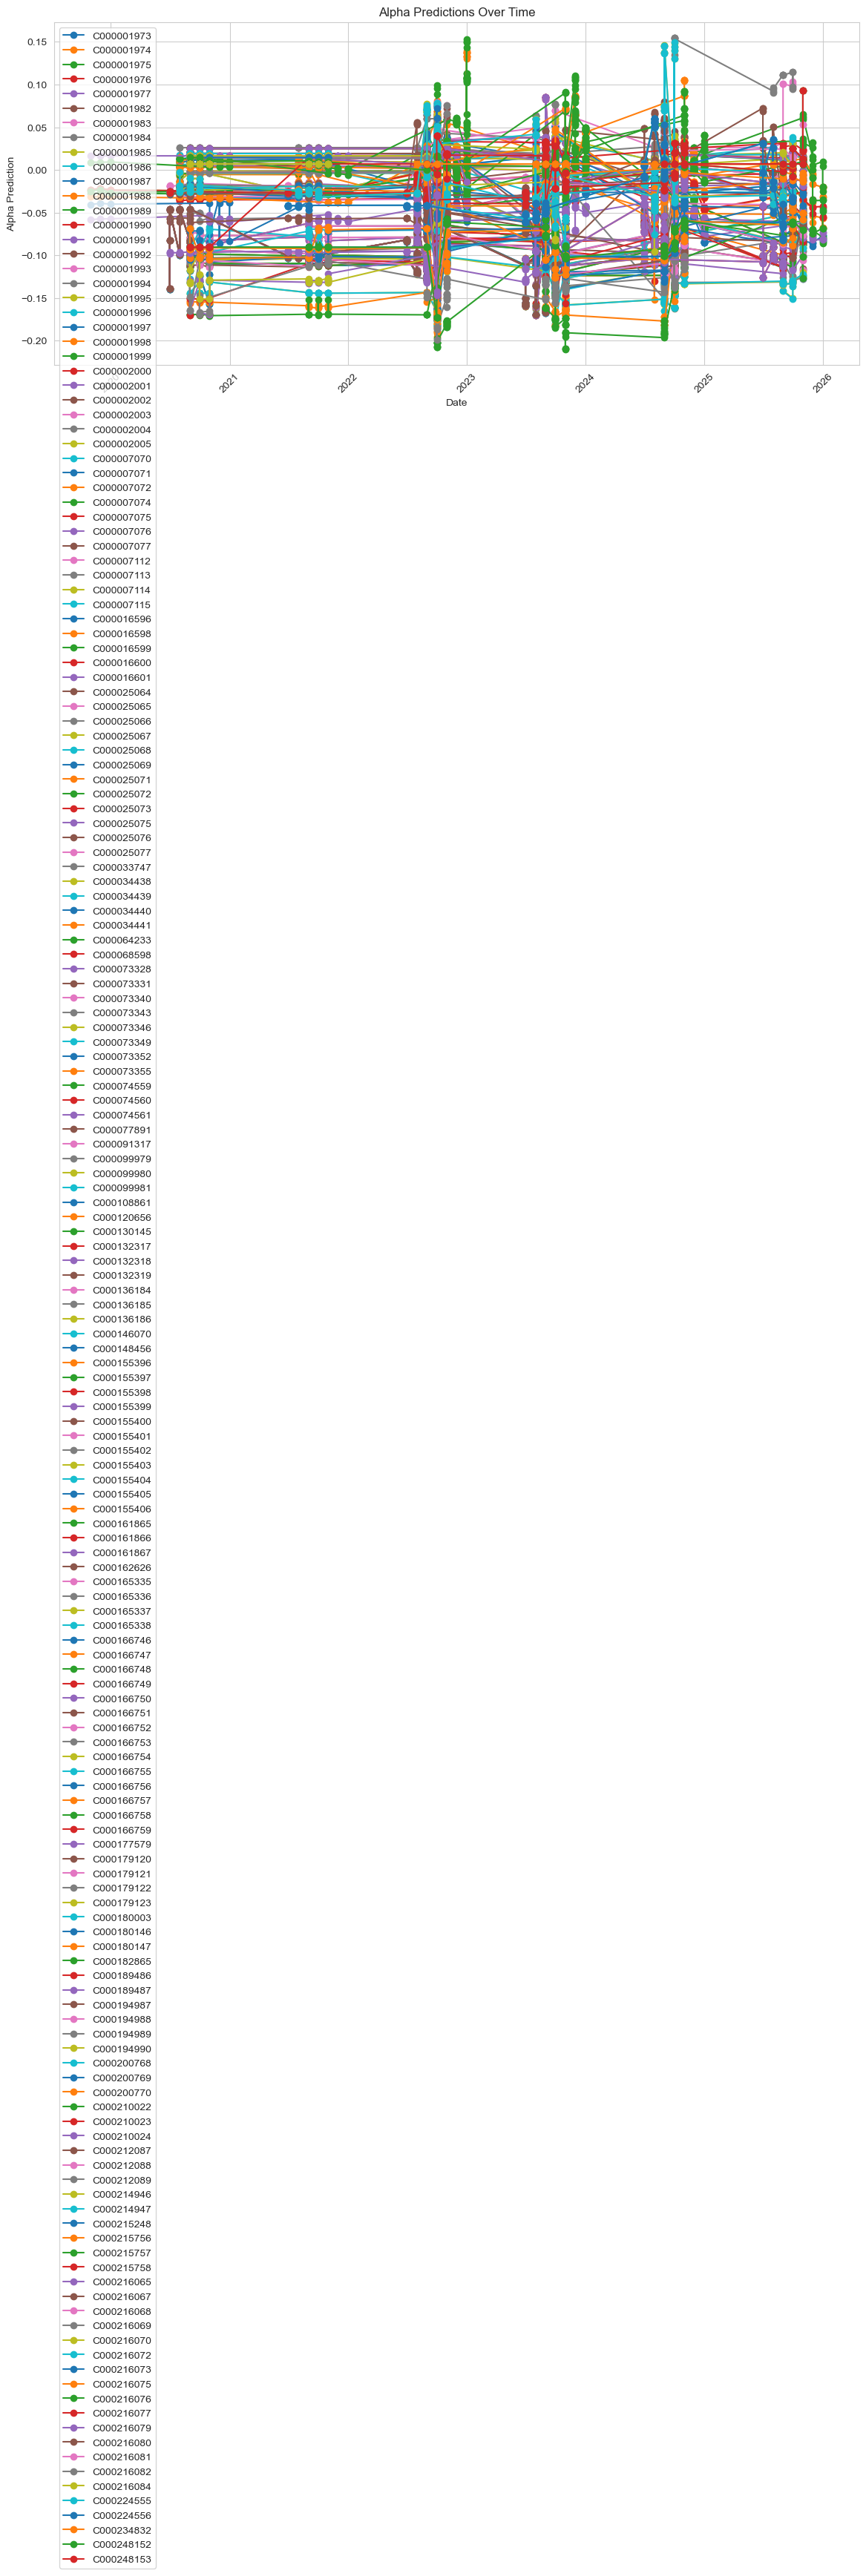

In [11]:
# Time series analysis (if multiple time periods)
if predictions['month_end'].nunique() > 1:
    plt.figure(figsize=(14, 6))
    
    for fund_id in predictions['class_id'].unique():
        fund_data = predictions[predictions['class_id'] == fund_id].sort_values('month_end')
        plt.plot(fund_data['month_end'], fund_data['ensemble_prediction'], 
                marker='o', label=fund_id)
    
    plt.title('Alpha Predictions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Alpha Prediction')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Single time period - no time series analysis")

In [12]:
# Export summary to Excel for sharing
with pd.ExcelWriter('predictions/prediction_summary.xlsx', engine='openpyxl') as writer:
    predictions.to_excel(writer, sheet_name='Raw_Predictions', index=False)
    fund_summary.to_excel(writer, sheet_name='Fund_Summary')
    
print("📊 Summary exported to: predictions/prediction_summary.xlsx")

📊 Summary exported to: predictions/prediction_summary.xlsx
